In [86]:
import warnings 
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import StackingClassifier
from unidecode import unidecode

In [87]:
df = pd.read_csv(r'D:\itlo\PYTHON\Vietnamese-SMS-Spam-Detection\dataset\Vietnamese SMS.csv')
df

,labels,texts_vi
0,spam,Nhập miễn phí trong 2 WKLY Comp để giành chiến...
1,ham,Bạn không nói quá sớm ... bạn đã nói ...
2,ham,"Không, tôi không nghĩ anh ấy đến USF, anh ấy s..."
3,ham,Ngay cả anh trai tôi cũng không thích nói chuy...
4,ham,Theo yêu cầu của bạn 'Melle Melle (Oru Minnami...
...,...,...
5564,spam,NaN
5565,ham,NaN
5566,ham,NaN
5567,ham,NaN


In [88]:
df.isnull().sum()

labels        0
texts_vi    449
dtype: int64

In [89]:
df.dropna(inplace=True)

print(df.isnull().sum())
print("Số dòng còn lại:", len(df))

labels      0
texts_vi    0
dtype: int64
Số dòng còn lại: 5120


In [90]:
df.isnull().sum()

labels      0
texts_vi    0
dtype: int64

In [91]:
df.dtypes

labels      object
texts_vi    object
dtype: object

In [92]:
df.loc[df['labels'] == 'spam', 'labels',] = 0
df.loc[df['labels'] == 'ham', 'labels',] = 1

In [93]:
df['labels'].value_counts()

labels
1    4427
0     693
Name: count, dtype: int64

In [94]:
import re
from pyvi import ViTokenizer

def preprocess_text(text):
    text = text.lower()
    text = unidecode(text)
    # 2. Xóa các ký tự đặc biệt, icon, số (giữ lại chữ cái và khoảng trắng)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text) # Xóa số nếu bạn thấy không cần thiết
    
    # 3. Tách từ Tiếng Việt (Word Segmentation)
    # Ví dụ: "trúng thưởng" -> "trúng_thưởng"
    text = ViTokenizer.tokenize(text)
    
    return text

In [95]:
df['cleaned_text'] = df['texts_vi'].apply(preprocess_text)
#print(df[['texts_vi', 'cleaned_text']].head())

In [96]:
X = df['cleaned_text']
Y = df['labels']

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 3)

In [98]:
feature_extraction = TfidfVectorizer(
    ngram_range=(1, 2),  
    min_df=2,            # Loại bỏ từ chỉ xuất hiện 1 lần duy nhất
    max_features=3000    # Giữ lại 3000 từ/cụm từ quan trọng nhất
)
X_train_features = feature_extraction.fit_transform(X_train).toarray()
X_test_features = feature_extraction.transform(X_test).toarray()

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# LOGISTIC REGRESSION

In [99]:
lr = LogisticRegression()
lr.fit(X_train_features, Y_train)


lr_train = lr.predict(X_train_features)
lr_test = lr.predict(X_test_features)

        
lr_train_acc = accuracy_score(Y_train, lr_train)
lr_test_acc = accuracy_score(Y_test, lr_test)


lr_precision = precision_score(Y_test, lr_test)
lr_recall = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)


print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

Logistic Regression:

Training Data Accuracy: 0.935546875
Testing Data Accuracy : 0.939453125
Precision             : 0.939873417721519
Recall                : 0.9944196428571429
F1 Score              : 0.9663774403470716


# DECISION TREES

In [100]:
dtrees = DecisionTreeClassifier()
dtrees.fit(X_train_features, Y_train)


dt_train = dtrees.predict(X_train_features)
dt_test = dtrees.predict(X_test_features)


dt_train_acc = accuracy_score(Y_train, dt_train)
dt_test_acc = accuracy_score(Y_test, dt_test)


dt_precision = precision_score(Y_test, dt_test)
dt_recall = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)


print("Decision Tress:\n")
print("Training Data Accuracy:", dt_train_acc)
print("Testing Data Accuracy :", dt_test_acc)

print("Precision             :", dt_precision)
print("Recall                :", dt_recall)
print("F1 Score              :", dt_f1)

Decision Tress:

Training Data Accuracy: 0.985595703125
Testing Data Accuracy : 0.923828125
Precision             : 0.9658314350797267
Recall                : 0.9464285714285714
F1 Score              : 0.9560315670800451


# K NEAREST NEIGHBORS

In [101]:
knn = KNeighborsClassifier()
knn.fit(X_train_features, Y_train)


knn_train = knn.predict(X_train_features)
knn_test = knn.predict(X_test_features)


knn_train_acc = accuracy_score(Y_train, knn_train)
knn_test_acc = accuracy_score(Y_test, knn_test)


knn_precision = precision_score(Y_test, knn_test)
knn_recall = recall_score(Y_test, knn_test)
knn_f1 = f1_score(Y_test, knn_test)


print("K Nearest Neighbors:\n")
print("Training Data Accuracy:", knn_train_acc)
print("Testing Data Accuracy :", knn_test_acc)

print("Precision             :", knn_precision)
print("Recall                :", knn_recall)
print("F1 Score              :", knn_f1)

K Nearest Neighbors:

Training Data Accuracy: 0.917236328125
Testing Data Accuracy : 0.919921875
Precision             : 0.9213250517598344
Recall                : 0.9933035714285714
F1 Score              : 0.9559613319011815


# RANDOM FOREST

In [102]:
rf = RandomForestClassifier()
rf.fit(X_train_features, Y_train)


rf_train = rf.predict(X_train_features)
rf_test = rf.predict(X_test_features)


rf_train_acc = accuracy_score(Y_train, rf_train)
rf_test_acc = accuracy_score(Y_test, rf_test)


rf_precision = precision_score(Y_test, rf_test)
rf_recall = recall_score(Y_test, rf_test)
rf_f1 = f1_score(Y_test, rf_test)


print("Random Forest:\n")
print("Training Data Accuracy:", rf_train_acc)
print("Testing Data Accuracy :", rf_test_acc)   
           
print("Precision             :", rf_precision)
print("Recall                :", rf_recall)
print("F1 Score              :", rf_f1)

Random Forest:

Training Data Accuracy: 0.985595703125
Testing Data Accuracy : 0.9443359375
Precision             : 0.9614961496149615
Recall                : 0.9754464285714286
F1 Score              : 0.968421052631579


# STACKING MODEL

In [103]:
estimators = [ ('lr', lr), ('dtree', dtrees), ('knn', knn), ('rf', rf) ]
stack = StackingClassifier(estimators, final_estimator = SVC(kernel='linear'))
stack.fit(X_train_features, Y_train)


stack_train = stack.predict(X_train_features)
stack_test = stack.predict(X_test_features)


stack_train_acc = accuracy_score(Y_train, stack_train)
stack_test_acc = accuracy_score(Y_test, stack_test)


stack_precision = precision_score(Y_test, stack_test)
stack_recall = recall_score(Y_test, stack_test)
stack_f1 = f1_score(Y_test, stack_test)


print("Stacking Classifier:\n")
print("Training Data Accuracy:", stack_train_acc)
print("Testing Data Accuracy :", stack_test_acc)   
           
print("Precision             :", stack_precision)
print("Recall                :", stack_recall)
print("F1 Score              :", stack_f1)

Stacking Classifier:

Training Data Accuracy: 0.9814453125
Testing Data Accuracy : 0.9462890625
Precision             : 0.9646408839779006
Recall                : 0.9743303571428571
F1 Score              : 0.9694614103275958


# Metrics Visualization

In [104]:
train_acc_list = {"LR":lr_train_acc,
                  "DT":dt_train_acc,
                  "KNN":knn_train_acc,
                  "RF":rf_train_acc,
                  "STACK":stack_train_acc}

test_acc_list = {"LR":lr_test_acc,
                  "DT":dt_test_acc,
                  "KNN":knn_test_acc,
                  "RF":rf_test_acc,
                  "STACK":stack_test_acc}

precision_list = {"LR":lr_precision,
                  "DT":dt_precision,
                  "KNN":knn_precision,
                  "RF":rf_precision,
                  "STACK":stack_precision}

recall_list = {"LR":lr_recall,
               "DT":dt_recall,
               "KNN":knn_recall,
               "RF":rf_recall,
               "STACK":stack_recall}

f1_list = {"LR":lr_f1,
               "DT":dt_f1,
               "KNN":knn_f1,
               "RF":rf_f1,
               "STACK":stack_f1}

In [105]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])

org = pd.concat([a1, a2, a3, a4, a5], axis = 1)
org

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score
LR,0.935547,0.939453,0.939873,0.994420,0.966377
DT,0.985596,0.923828,0.965831,0.946429,0.956032
KNN,0.917236,0.919922,0.921325,0.993304,0.955961
RF,0.985596,0.944336,0.961496,0.975446,0.968421
STACK,0.981445,0.946289,0.964641,0.974330,0.969461


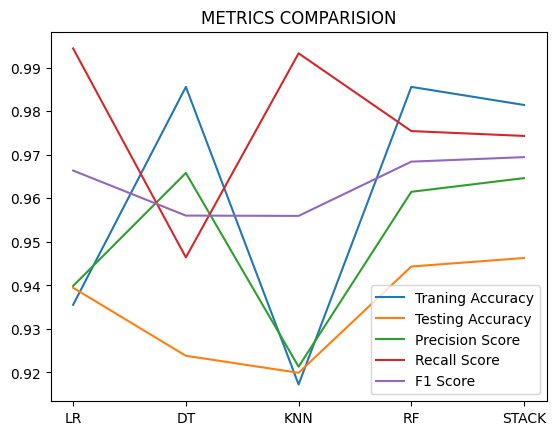

In [106]:
alg = ['LR','DT','KNN','RF','STACK']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
legend = ['Traning Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

In [ ]:
raw_input = ["Chuc mung ban trung thuong 100 trieu"]
cleaned_input = [preprocess_text(msg) for msg in raw_input]
input_sms_features = feature_extraction.transform(cleaned_input)
prediction = stack.predict(input_sms_features)

if prediction[0] == 0:
    print("SPAM SMS")
else:
    print("HAM SMS")

HAM SMS
